C:\Users\Anowar Hossain\AppData\Local\Temp\ipykernel_9036\2262210436.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vendor_fulfillment_rate = pdata.groupby('Vendor').apply(fulfillment_rate).round(2)


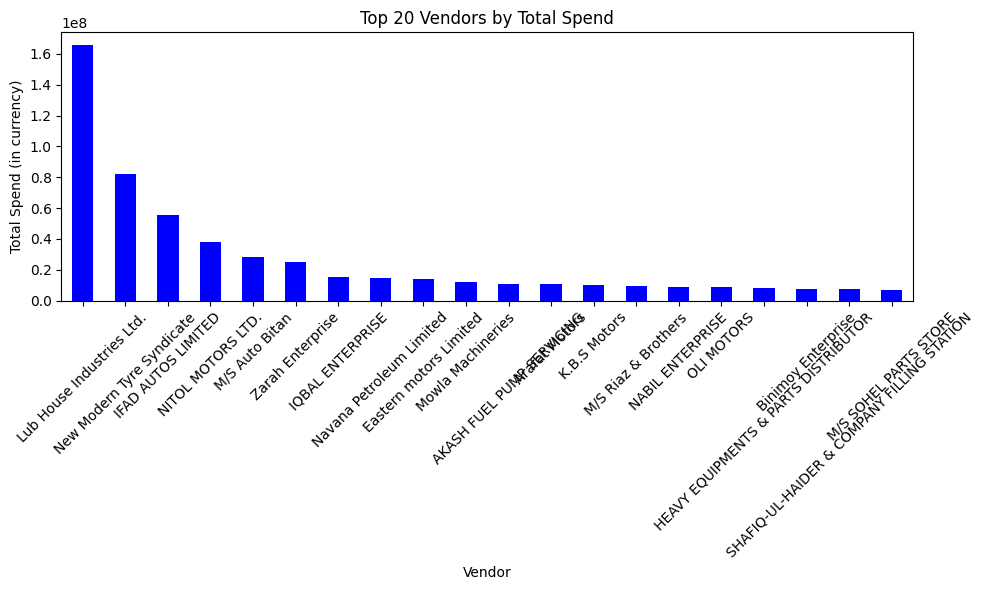

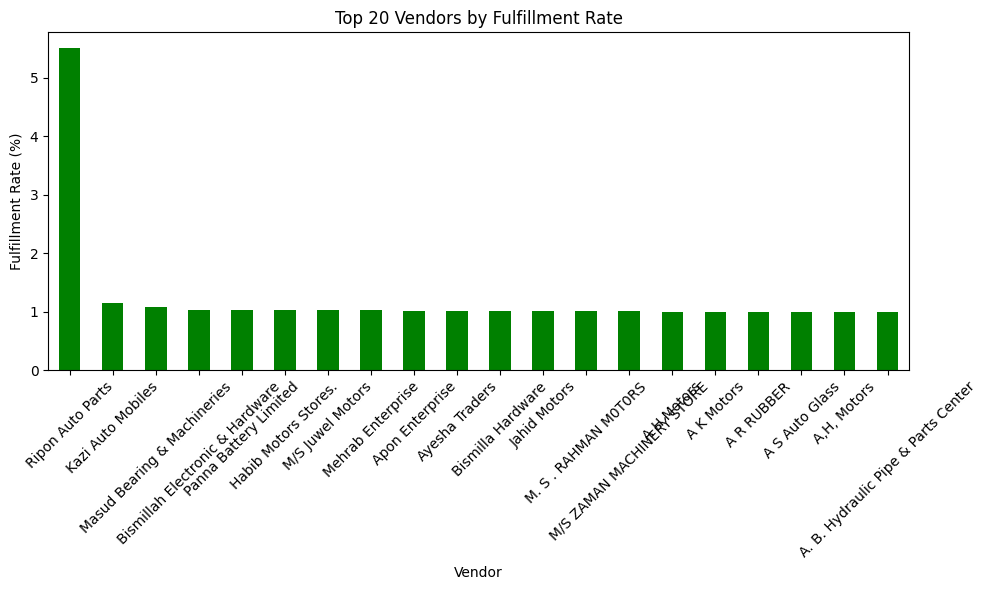

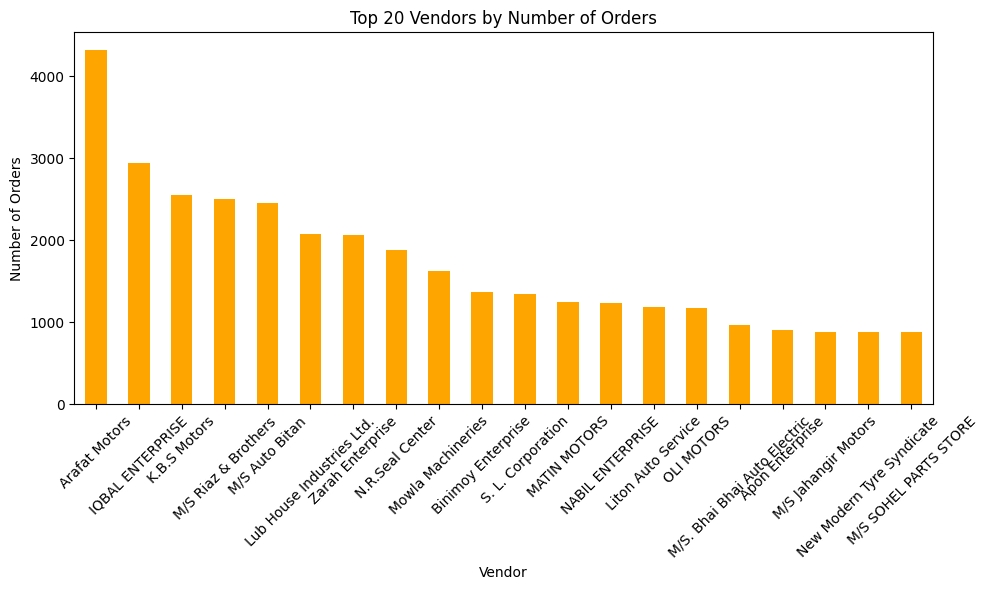

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert relevant columns to numeric (if necessary)
pdata['Delivered Qty'] = pd.to_numeric(pdata['Delivered Qty'], errors='coerce')
pdata['Received Qty'] = pd.to_numeric(pdata['Received Qty'], errors='coerce')
pdata['Total Payable'] = pd.to_numeric(pdata['Total Payable'], errors='coerce')

# Remove rows with missing values in critical columns
pdata = pdata.dropna(subset=['Delivered Qty', 'Received Qty', 'Total Payable'])

# Group by Vendor and calculate key metrics

# 1. Fulfillment Rate: Received Qty / Delivered Qty (Handled zero division)
def fulfillment_rate(group):
    total_delivered = group['Delivered Qty'].sum()
    total_received = group['Received Qty'].sum()
    return total_received / total_delivered if total_delivered > 0 else 0

vendor_fulfillment_rate = pdata.groupby('Vendor').apply(fulfillment_rate).round(2)

# 2. Total Spend by Vendor
vendor_total_spend = pdata.groupby('Vendor')['Total Payable'].sum().round(2)

# 3. Number of Orders by Vendor
vendor_order_count = pdata['Vendor'].value_counts()

# Get top 20 suppliers based on total spend
top_20_spend = vendor_total_spend.nlargest(20)

# Get top 20 suppliers based on fulfillment rate
top_20_fulfillment = vendor_fulfillment_rate.nlargest(20)

# Get top 20 suppliers based on number of orders
top_20_orders = vendor_order_count.nlargest(20)

# Plot 1: Top 20 Vendors by Total Spend
plt.figure(figsize=(10, 6))
top_20_spend.plot(kind='bar', color='blue')
plt.title('Top 20 Vendors by Total Spend')
plt.xlabel('Vendor')
plt.ylabel('Total Spend (in currency)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Top 20 Vendors by Fulfillment Rate
plt.figure(figsize=(10, 6))
top_20_fulfillment.plot(kind='bar', color='green')
plt.title('Top 20 Vendors by Fulfillment Rate')
plt.xlabel('Vendor')
plt.ylabel('Fulfillment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Top 20 Vendors by Number of Orders
plt.figure(figsize=(10, 6))
top_20_orders.plot(kind='bar', color='orange')
plt.title('Top 20 Vendors by Number of Orders')
plt.xlabel('Vendor')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


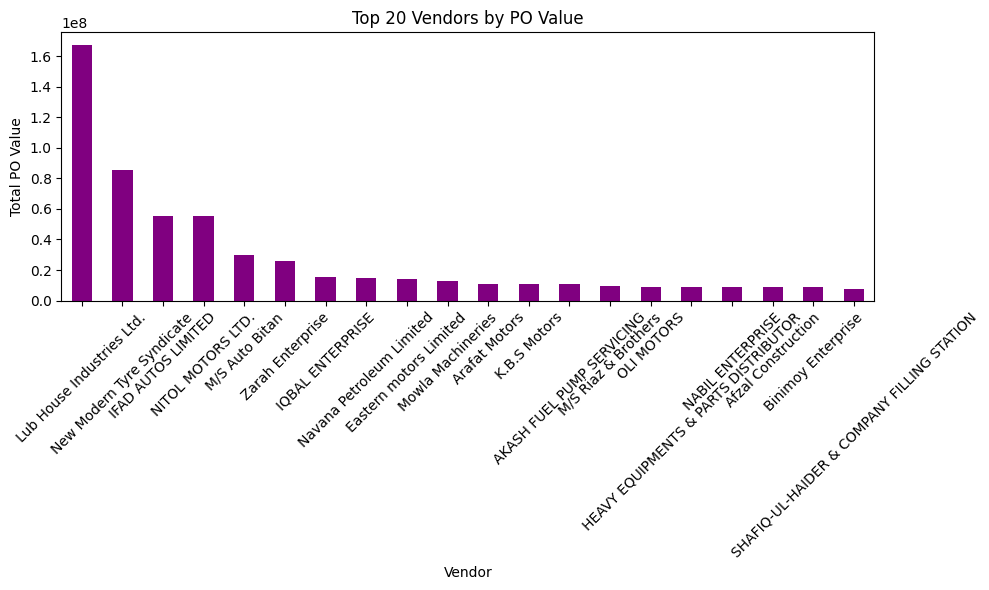

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert relevant columns to numeric (if necessary)
pdata['PO Value'] = pd.to_numeric(pdata['PO Value'], errors='coerce')

# Remove rows with missing values in 'PO Value' and 'Vendor'
pdata = pdata.dropna(subset=['PO Value', 'Vendor'])

# Group by Vendor and calculate total PO Value for each
vendor_po_value = pdata.groupby('Vendor')['PO Value'].sum().round(2)

# Get top 20 suppliers based on PO Value
top_20_po_value = vendor_po_value.nlargest(20)

# Plot: Top 20 Vendors by PO Value
plt.figure(figsize=(10, 6))
top_20_po_value.plot(kind='bar', color='purple')
plt.title('Top 20 Vendors by PO Value')
plt.xlabel('Vendor')
plt.ylabel('Total PO Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


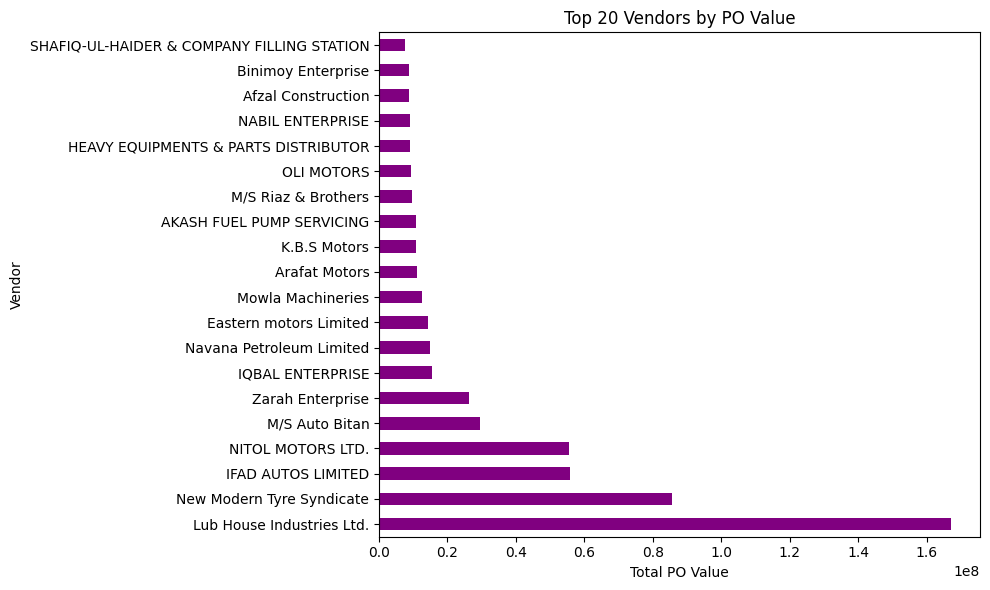

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert relevant columns to numeric (if necessary)
pdata['PO Value'] = pd.to_numeric(pdata['PO Value'], errors='coerce')

# Remove rows with missing values in 'PO Value' and 'Vendor'
pdata = pdata.dropna(subset=['PO Value', 'Vendor'])

# Group by Vendor and calculate total PO Value for each
vendor_po_value = pdata.groupby('Vendor')['PO Value'].sum().round(2)

# Get top 20 suppliers based on PO Value
top_20_po_value = vendor_po_value.nlargest(20)

# Plot: Horizontal Bar Chart for Top 20 Vendors by PO Value
plt.figure(figsize=(10, 6))
top_20_po_value.plot(kind='barh', color='purple')  # Using 'barh' for horizontal bar chart
plt.title('Top 20 Vendors by PO Value')
plt.xlabel('Total PO Value')
plt.ylabel('Vendor')
plt.tight_layout()
plt.show()


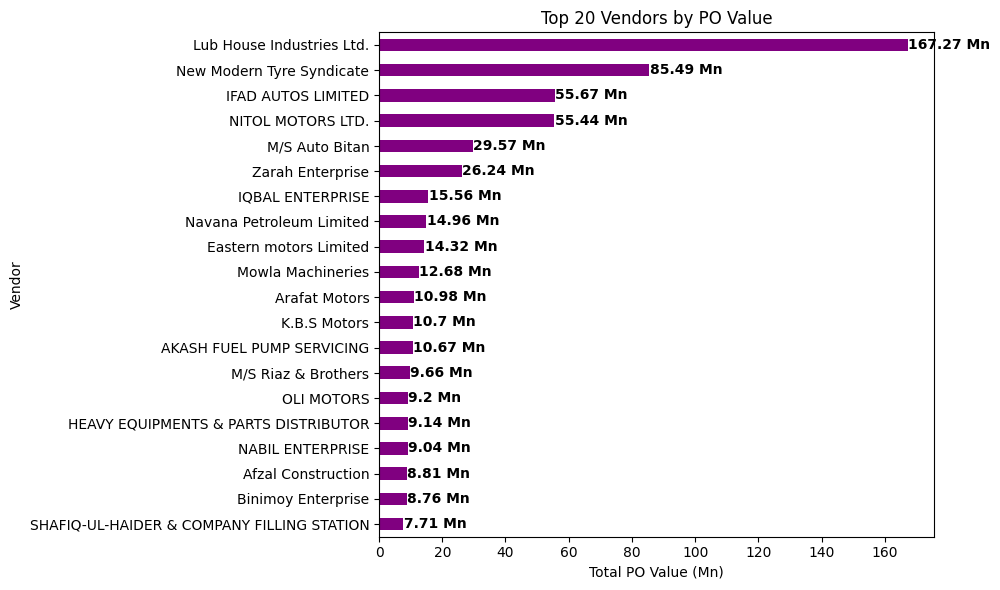

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert relevant columns to numeric (if necessary)
pdata['PO Value'] = pd.to_numeric(pdata['PO Value'], errors='coerce')

# Remove rows with missing values in 'PO Value' and 'Vendor'
pdata = pdata.dropna(subset=['PO Value', 'Vendor'])

# Group by Vendor and calculate total PO Value for each
vendor_po_value = pdata.groupby('Vendor')['PO Value'].sum().round(2)

# Get top 20 suppliers based on PO Value, sorted in descending order
top_20_po_value = vendor_po_value.nlargest(20).sort_values(ascending=True)  # Sorting for correct order in horizontal bar

# Convert PO Value to Mn for readability
top_20_po_value_mn = (top_20_po_value / 1e6).round(2)

# Plot: Horizontal Bar Chart for Top 20 Vendors by PO Value
plt.figure(figsize=(10, 6))
bars = top_20_po_value_mn.plot(kind='barh', color='purple')

# Add value labels in Mn next to each bar
for i, v in enumerate(top_20_po_value_mn):
    plt.text(v + 0.1, i, f'{v} Mn', va='center', color='black', fontweight='bold')  # Adjusting position slightly

# Title and labels
plt.title('Top 20 Vendors by PO Value')
plt.xlabel('Total PO Value (Mn)')
plt.ylabel('Vendor')
plt.tight_layout()
plt.show()


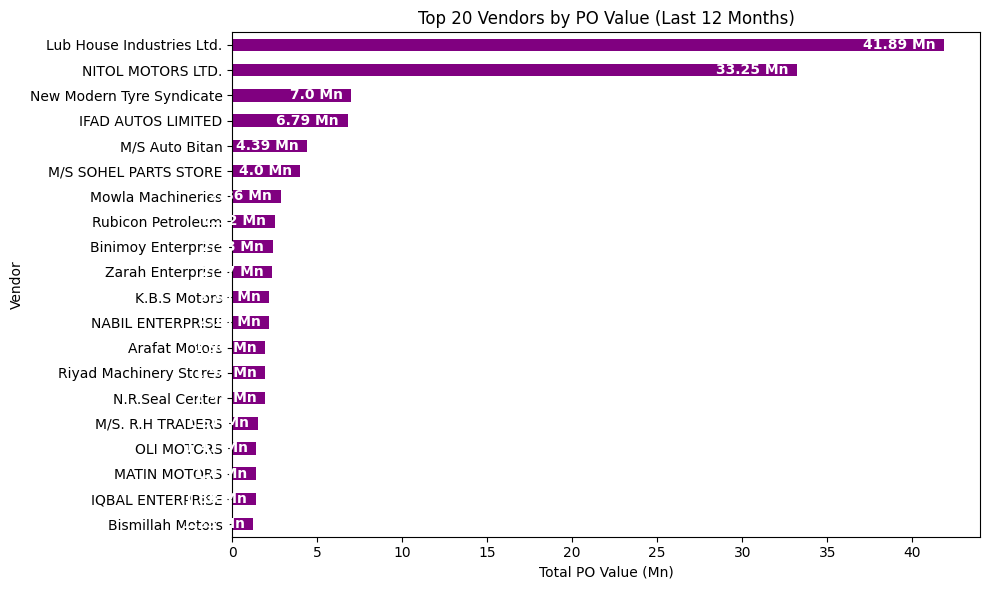

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert relevant columns to numeric (if necessary)
pdata['PO Value'] = pd.to_numeric(pdata['PO Value'], errors='coerce')

# Remove rows with missing values in 'PO Value', 'Vendor', and 'Created On'
pdata = pdata.dropna(subset=['PO Value', 'Vendor', 'Created On'])

# Convert 'Created On' to datetime format
pdata['Created On'] = pd.to_datetime(pdata['Created On'])

# Filter data for the last 12 months
last_12_months_data = pdata[pdata['Created On'] >= pd.to_datetime('today') - pd.DateOffset(months=12)]

# Group by Vendor and calculate total PO Value for the last 12 months
vendor_po_value_last_12_months = last_12_months_data.groupby('Vendor')['PO Value'].sum().round(2)

# Get top 20 suppliers based on PO Value in the last 12 months, sorted in descending order
top_20_po_value_last_12_months = vendor_po_value_last_12_months.nlargest(20).sort_values(ascending=True)

# Convert PO Value to Mn for readability
top_20_po_value_last_12_months_mn = (top_20_po_value_last_12_months / 1e6).round(2)

# Plot: Horizontal Bar Chart for Top 20 Vendors by PO Value in the Last 12 Months
plt.figure(figsize=(10, 6))
bars = top_20_po_value_last_12_months_mn.plot(kind='barh', color='purple')

# Add value labels inside the bars, right-aligned
for i, v in enumerate(top_20_po_value_last_12_months_mn):
    plt.text(v - 0.5, i, f'{v} Mn', va='center', ha='right', color='white', fontweight='bold')

# Title and labels
plt.title('Top 20 Vendors by PO Value (Last 12 Months)')
plt.xlabel('Total PO Value (Mn)')
plt.ylabel('Vendor')
plt.tight_layout()
plt.show()


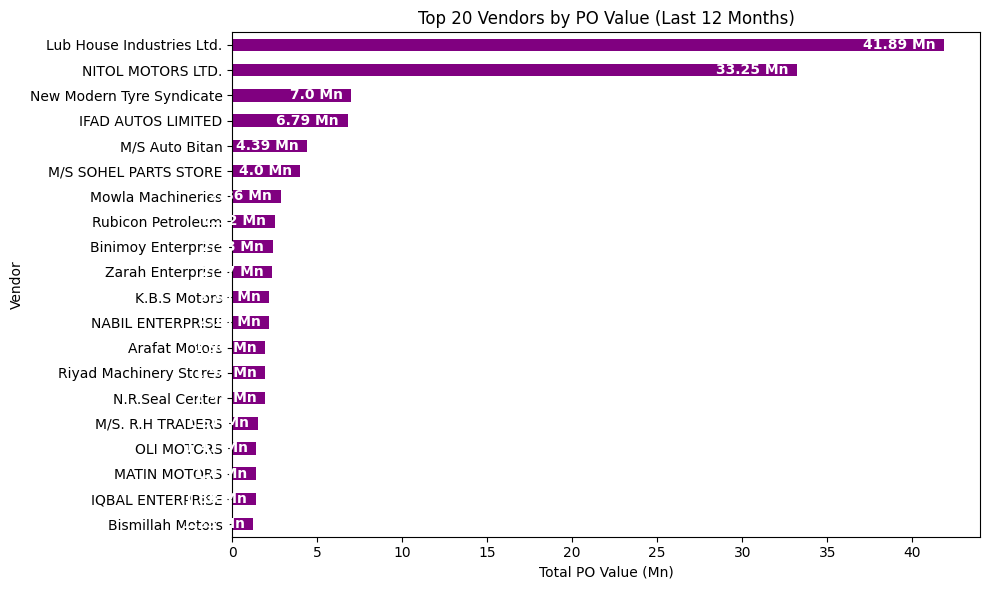

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert relevant columns to numeric (if necessary)
pdata['PO Value'] = pd.to_numeric(pdata['PO Value'], errors='coerce')

# Remove rows with missing values in 'PO Value', 'Vendor', and 'Created On'
pdata = pdata.dropna(subset=['PO Value', 'Vendor', 'Created On'])

# Convert 'Created On' to datetime format (assuming it's the PO Date)
pdata['Created On'] = pd.to_datetime(pdata['Created On'])

# Filter data for the last 12 months
last_12_months_data = pdata[pdata['Created On'] >= pd.to_datetime('today') - pd.DateOffset(months=12)]

# Group by Vendor and calculate total PO Value for the last 12 months
vendor_po_value_last_12_months = last_12_months_data.groupby('Vendor')['PO Value'].sum().round(2)

# Get top 20 suppliers based on PO Value in the last 12 months, sorted in descending order
top_20_po_value_last_12_months = vendor_po_value_last_12_months.nlargest(20).sort_values(ascending=True)

# Convert PO Value to Mn for readability
top_20_po_value_last_12_months_mn = (top_20_po_value_last_12_months / 1e6).round(2)

# Plot: Horizontal Bar Chart for Top 20 Vendors by PO Value in the Last 12 Months
plt.figure(figsize=(10, 6))
bars = top_20_po_value_last_12_months_mn.plot(kind='barh', color='purple')

# Add value labels inside the bars, right-aligned or outside if too small
for i, v in enumerate(top_20_po_value_last_12_months_mn):
    if v > 1:  # If the bar is large enough to fit the label
        plt.text(v - 0.5, i, f'{v} Mn', va='center', ha='right', color='white', fontweight='bold', fontsize=10)
    else:  # If the bar is too small, place the label outside the bar
        plt.text(v + 0.1, i, f'{v} Mn', va='center', ha='left', color='black', fontweight='bold', fontsize=10)

# Title and labels
plt.title('Top 20 Vendors by PO Value (Last 12 Months)')
plt.xlabel('Total PO Value (Mn)')
plt.ylabel('Vendor')
plt.tight_layout()
plt.show()


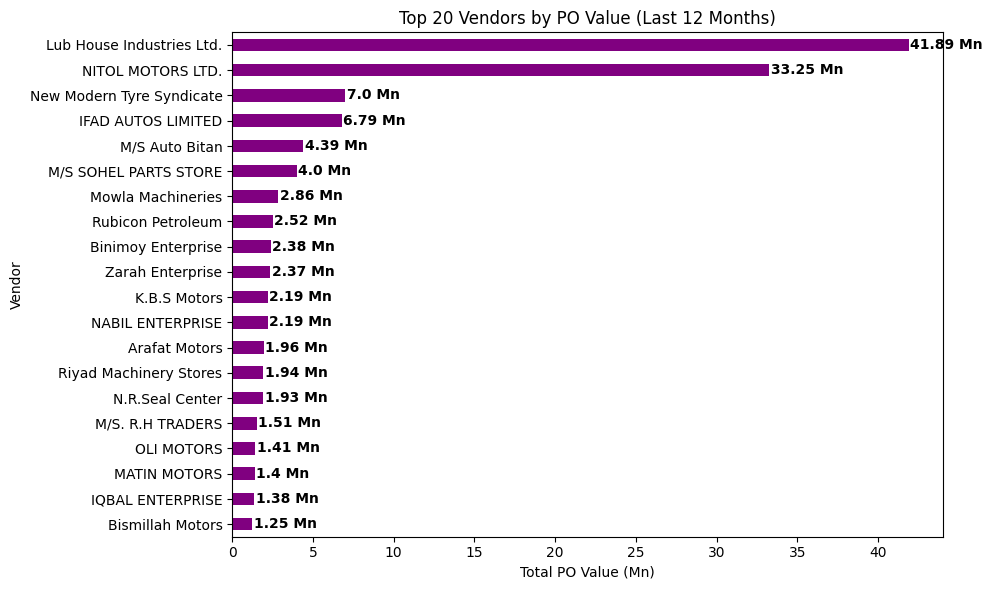

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert relevant columns to numeric (if necessary)
pdata['PO Value'] = pd.to_numeric(pdata['PO Value'], errors='coerce')

# Remove rows with missing values in 'PO Value', 'Vendor', and 'Created On'
pdata = pdata.dropna(subset=['PO Value', 'Vendor', 'Created On'])

# Convert 'Created On' to datetime format
pdata['Created On'] = pd.to_datetime(pdata['Created On'])

# Filter data for the last 12 months
last_12_months_data = pdata[pdata['Created On'] >= pd.to_datetime('today') - pd.DateOffset(months=12)]

# Group by Vendor and calculate total PO Value for the last 12 months
vendor_po_value_last_12_months = last_12_months_data.groupby('Vendor')['PO Value'].sum().round(2)

# Get top 20 suppliers based on PO Value in the last 12 months, sorted in descending order
top_20_po_value_last_12_months = vendor_po_value_last_12_months.nlargest(20).sort_values(ascending=True)

# Convert PO Value to Mn for readability
top_20_po_value_last_12_months_mn = (top_20_po_value_last_12_months / 1e6).round(2)

# Plot: Horizontal Bar Chart for Top 20 Vendors by PO Value in the Last 12 Months
plt.figure(figsize=(10, 6))
bars = top_20_po_value_last_12_months_mn.plot(kind='barh', color='purple')

# Add value labels in Mn next to each bar
for i, v in enumerate(top_20_po_value_last_12_months_mn):
    plt.text(v + 0.1, i, f'{v} Mn', va='center', color='black', fontweight='bold')

# Title and labels
plt.title('Top 20 Vendors by PO Value (Last 12 Months)')
plt.xlabel('Total PO Value (Mn)')
plt.ylabel('Vendor')
plt.tight_layout()
plt.show()
